# Phase I
Single neuron fiber, stimulation and recording via intracellular electrode.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from neuron.units import ms, mV, um
h.load_file('stdrun.hoc') 

1.0

In [36]:
axon = h.Section(name='axon')
axon.L = 20000 * um
axon.diam = 10 * um
axon.nseg = 1001
axon.Ra = 35.4
axon.cm = 1
axon.insert(h.hh)
axon.insert(h.pas)

for seg in axon:
    seg.pas.e = -65 * mV

In [37]:
iclamp = h.IClamp(axon(0.1))
iclamp.delay = 1 * ms
iclamp.dur = 30 * ms
# iclamp.amp = 100

In [38]:
ramp_t = h.Vector(np.arange(0 * ms, 30 * ms, 0.025 * ms))
ramp_amp = h.Vector(np.sin(ramp_t)) * 10
ramp_amp.play(iclamp._ref_amp, ramp_t, True) # last True says interpolate

Vector[14]

change the waveform to rectangular pulse
Pulse width 20 - 2,000 µs
Frequency 2 - 10,000 Hz
 

In [40]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

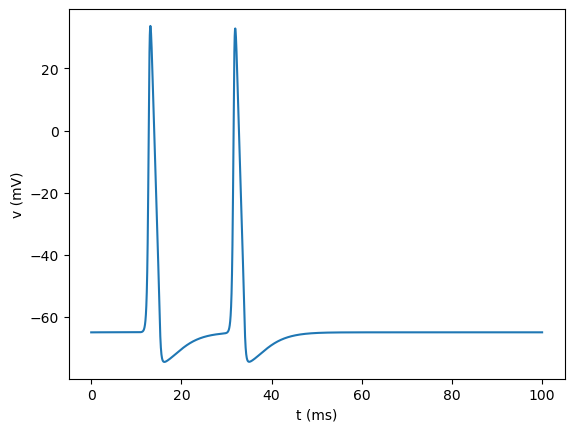

In [41]:
fig, ax = plt.subplots()
ax.plot(t, v)
ax.set_xlabel('t (ms)')
ax.set_ylabel('v (mV)')
plt.show()